In [ ]:
#Class work, get company weekly prices data from yfinance and check stationarity using graphs

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\Blessy Thomas\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
company_data = yf.download('ITC.NS', period='5y', interval ="1wk")
data_df = pd.DataFrame(company_data['Close'])
data_df

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2019-08-12,253.000000
2019-08-19,236.100006
2019-08-26,245.649994
2019-09-02,243.899994
2019-09-09,239.899994
...,...
2024-07-15,474.549988
2024-07-22,502.200012
2024-07-29,489.100006


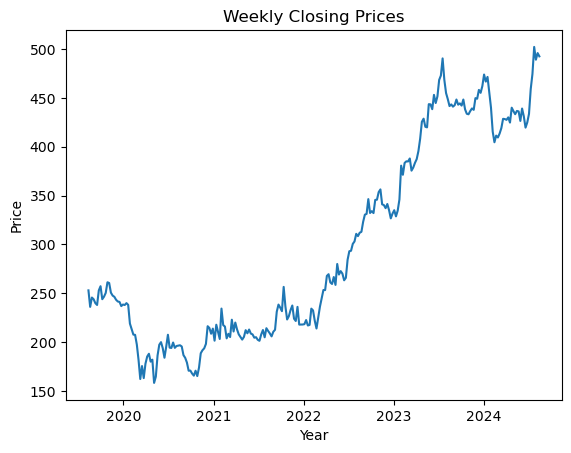

In [5]:

# Plot the weekly closing prices
plt.plot(data_df['Close'])
plt.title('Weekly Closing Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


In [6]:
# Calculate the logarithmic weekly returns

data_df['Ln_Return'] = np.log(data_df['Close'] / data_df['Close'].shift(1))
print(data_df)


                 Close  Ln_Return
Date                             
2019-08-12  253.000000        NaN
2019-08-19  236.100006  -0.069134
2019-08-26  245.649994   0.039652
2019-09-02  243.899994  -0.007149
2019-09-09  239.899994  -0.016536
...                ...        ...
2024-07-15  474.549988   0.033208
2024-07-22  502.200012   0.056632
2024-07-29  489.100006  -0.026431
2024-08-05  495.899994   0.013807
2024-08-12  492.549988  -0.006778

[262 rows x 2 columns]


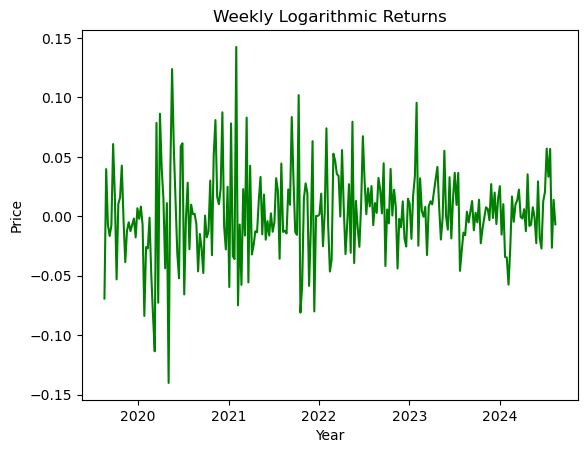

In [7]:
# Plot the weekly returns 

plt.plot(data_df['Ln_Return'], color="green")
plt.title('Weekly Logarithmic Returns')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [97]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2019-08-12 to 2024-08-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      262 non-null    float64
 1   Ln_Return  261 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


In [100]:
# Checking stationarity of the level data (ln_return) using Augmented Dicky Fuller Test
#They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject

# H0: The data is not stationary
# H1: Data is stationary


In [10]:
from statsmodels.tsa.stattools import adfuller
X = data_df["Ln_Return"].dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -17.727138
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary


In [ ]:
#Applying regression on the data by keeping level data as dependent variable and lag 1 data as independent vairable

In [ ]:
# Creating a Lag 1 Columns for our independent variable

In [102]:
# Create the lagged column
data_df['lag_1_return'] = data_df['Ln_Return'].shift(1)
data_df['lag_2_return'] = data_df['Ln_Return'].shift(2)
# Now df contains the original 'value' column and the new 'lagged_column'
print(data_df)


                  Close  Ln_Return  lag_1_return  lag_2_return
Date                                                          
2019-08-12  1168.517212        NaN           NaN           NaN
2019-08-19  1166.551392  -0.001684           NaN           NaN
2019-08-26  1141.590088  -0.021630     -0.001684           NaN
2019-09-02  1117.771729  -0.021085     -0.021630     -0.001684
2019-09-09  1120.606201   0.002533     -0.021085     -0.021630
...                 ...        ...           ...           ...
2024-07-15  3110.300049  -0.026383      0.005086      0.014727
2024-07-22  3018.050049  -0.030108     -0.026383      0.005086
2024-07-29  2998.649902  -0.006449     -0.030108     -0.026383
2024-08-05  2948.600098  -0.016832     -0.006449     -0.030108
2024-08-12  2920.100098  -0.009713     -0.016832     -0.006449

[262 rows x 4 columns]


In [103]:

# Step 2: Drop rows with missing values
data_df = data_df.dropna(subset=['Ln_Return'])
data_df = data_df.dropna(subset=['lag_1_return'])
data_df = data_df.dropna(subset=['lag_2_return'])
data_df

,Close,Ln_Return,lag_1_return,lag_2_return
Date,,,,
2019-09-02,1117.771729,-0.021085,-0.021630,-0.001684
2019-09-09,1120.606201,0.002533,-0.021085,-0.021630
2019-09-16,1146.893188,0.023187,0.002533,-0.021085
2019-09-23,1196.907227,0.042684,0.023187,0.002533
2019-09-30,1196.038574,-0.000726,0.042684,0.023187
...,...,...,...,...
2024-07-15,3110.300049,-0.026383,0.005086,0.014727
2024-07-22,3018.050049,-0.030108,-0.026383,0.005086
2024-07-29,2998.649902,-0.006449,-0.030108,-0.026383


                            OLS Regression Results                            
Dep. Variable:              Ln_Return   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.520
Date:                Thu, 15 Aug 2024   Prob (F-statistic):              0.221
Time:                        23:43:29   Log-Likelihood:                 489.50
No. Observations:                 259   AIC:                            -973.0
Df Residuals:                     256   BIC:                            -962.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0031      0.002      1.343   

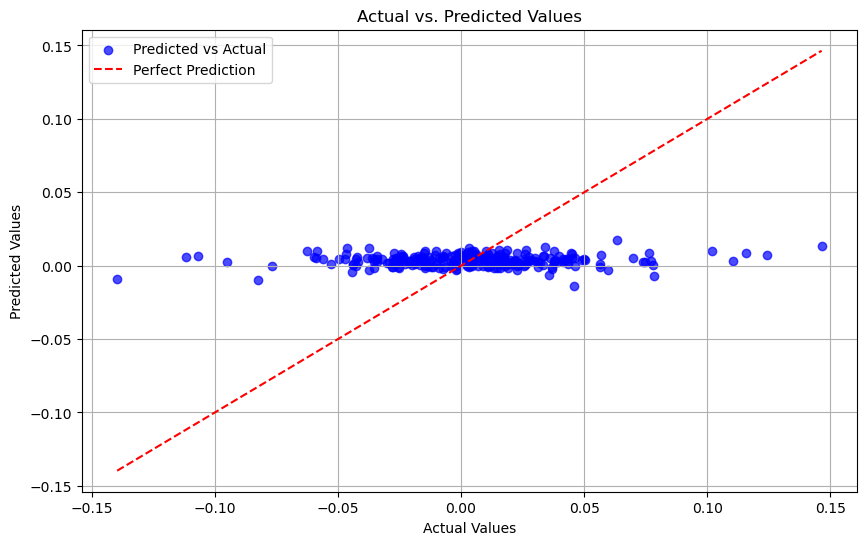

In [104]:
import statsmodels.api as sm


# Step 3: Define the dependent and independent variables
X = data_df[['lag_1_return', 'lag_2_return']]  # Independent variable
y = data_df['Ln_Return']     # Dependent variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y,X).fit()

# Output the summary of the regression
print(model.summary())

predicted_values = model.predict(X)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')  # Line of perfect prediction
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [105]:
# Calculate the residuals
residuals = model.resid

# Add residuals to the DataFrame for analysis
data_df['residuals'] = residuals

data_df


,Close,Ln_Return,lag_1_return,lag_2_return,residuals
Date,,,,,
2019-09-02,1117.771729,-0.021085,-0.021630,-0.001684,-0.022653
2019-09-09,1120.606201,0.002533,-0.021085,-0.021630,0.002583
2019-09-16,1146.893188,0.023187,0.002533,-0.021085,0.021678
2019-09-23,1196.907227,0.042684,0.023187,0.002533,0.037892
2019-09-30,1196.038574,-0.000726,0.042684,0.023187,-0.008481
...,...,...,...,...,...
2024-07-15,3110.300049,-0.026383,0.005086,0.014727,-0.031025
2024-07-22,3018.050049,-0.030108,-0.026383,0.005086,-0.031933
2024-07-29,2998.649902,-0.006449,-0.030108,-0.026383,-0.005425


In [73]:
# Check correlation between residuals and independent variables
correlation_with_lag1 = data_df['residuals'].corr(data_df['lag_1_return'])
correlation_with_lag2 = data_df['residuals'].corr(data_df['lag_2_return'])

if correlation_with_lag1 and correlation_with_lag2
print(f"Correlation between residuals and lag_1_return: {correlation_with_lag1}")
print(f"Correlation between residuals and lag_2_return: {correlation_with_lag2}")

Correlation between residuals and lag_1_return: -1.7456177060511204e-17
Correlation between residuals and lag_2_return: 1.7450700432434026e-17
